In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.Dataframe(r'https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=us:*&NAICS2017=00&key=bccfff37a66ca0c564d5d5d80d0236771b334f9b',header='False')
# df.to_json(orient='table')
company = pd.read_json(r'https://api.census.gov/data/2018/abscs?get=NAME,FIRMPDEMP&for=us&NAICS2017=00&key=bccfff37a66ca0c564d5d5d80d0236771b334f9b')
company.columns = company.iloc[0]
company =  company.iloc[1:].reset_index(drop=True)
company['NAME'] = company['NAME'].astype(str)
company['FIRMPDEMP'] = company['FIRMPDEMP'].astype(int)
company

,NAME,FIRMPDEMP,NAICS2017,us
0,United States,5722142,00,1


In [3]:
business = pd.read_json(r'http://api.census.gov/data/2018/abscb?get=BUSCHAR_LABEL,QDESC,QDESC_LABEL,FIRMPDEMP,EMP&for=us&BUSCHAR=BM&BUSCHAR=BN&key=bccfff37a66ca0c564d5d5d80d0236771b334f9b')

business.columns = business.iloc[0]

business = business.iloc[1:].reset_index(drop=True)

business.rename(columns={'FIRMPDEMP':'FIRM_COUNT'}, inplace=True)

business['FIRM_COUNT'] = business['FIRM_COUNT'].astype(int)
business['EMP'] = business['EMP'].astype(int)

business


,BUSCHAR_LABEL,QDESC,QDESC_LABEL,FIRM_COUNT,EMP,BUSCHAR,us
0,Family-owned,B02,FAMOWN,787775,8048586,BM,1
1,Not family-owned,B02,FAMOWN,1893857,14397079,BN,1


In [4]:
business['avg_emp_per_firm'] = business['EMP'] / business['FIRM_COUNT']
business

,BUSCHAR_LABEL,QDESC,QDESC_LABEL,FIRM_COUNT,EMP,BUSCHAR,us,avg_emp_per_firm
0,Family-owned,B02,FAMOWN,787775,8048586,BM,1,10.216859
1,Not family-owned,B02,FAMOWN,1893857,14397079,BN,1,7.601988


In [5]:
cs_bc = company.merge(business, how='inner', on=["us"])
cs_bc = cs_bc[['NAME','BUSCHAR_LABEL','FIRMPDEMP','us','FIRM_COUNT','EMP','avg_emp_per_firm']]

cs_bc

,NAME,BUSCHAR_LABEL,FIRMPDEMP,us,FIRM_COUNT,EMP,avg_emp_per_firm
0,United States,Family-owned,5722142,1,787775,8048586,10.216859
1,United States,Not family-owned,5722142,1,1893857,14397079,7.601988


Text(0, 0.5, 'Avg Number of Employees per Firm')

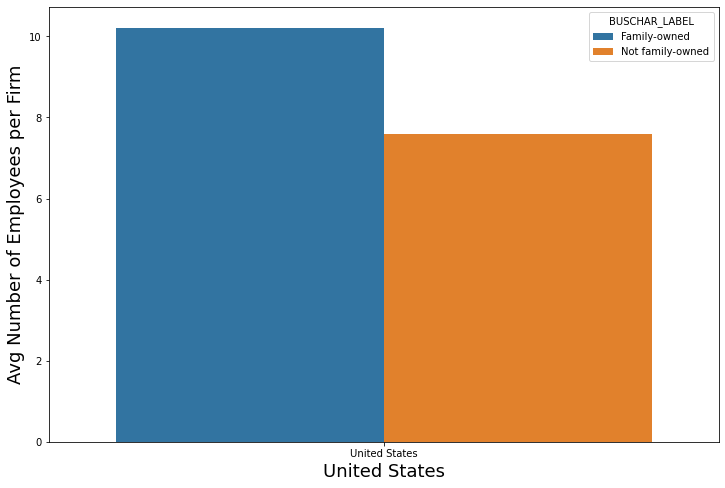

In [6]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x=cs_bc[0:50]['NAME'], y=cs_bc[0:50]['avg_emp_per_firm'], hue='BUSCHAR_LABEL', data=cs_bc)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('United States', size=18)
ax.set_ylabel('Avg Number of Employees per Firm', size=18)

In [98]:
business_survival = pd.read_json(r'http://api.census.gov/data/2018/abscb?get=BUSCHAR_LABEL,QDESC,QDESC_LABEL,YIBSZFI_LABEL,FIRMPDEMP,EMP&for=us&BUSCHAR=BM&BUSCHAR=BN&YIBSZFI!=001&key=bccfff37a66ca0c564d5d5d80d0236771b334f9b')

business_survival.columns = business_survival.iloc[0]

business_survival = business_survival.iloc[1:].reset_index(drop=True)

business_survival.rename(columns={'FIRMPDEMP':'FIRM_COUNT','BUSCHAR_LABEL':'Ownership_Type'}, inplace=True)

business_survival['FIRM_COUNT'] = business_survival['FIRM_COUNT'].astype(int)
business_survival['EMP'] = business_survival['EMP'].astype(int)
business_survival = business_survival[['Ownership_Type','YIBSZFI_LABEL','FIRM_COUNT','us']]

business_survival.loc[ business_survival['YIBSZFI_LABEL'] == 'Firms with 2 to 3 years in business', 'YIBSZFI_LABEL'] = '2 to 3 Years'
business_survival.loc[ business_survival['YIBSZFI_LABEL'] == 'Firms with 4 to 5 years in business', 'YIBSZFI_LABEL'] = '4 to 5 Years'
business_survival.loc[ business_survival['YIBSZFI_LABEL'] == 'Firms with 6 to 10 years in business', 'YIBSZFI_LABEL'] = '6 to 10 Years'
business_survival.loc[ business_survival['YIBSZFI_LABEL'] == 'Firms with 11 to 15 years in business', 'YIBSZFI_LABEL'] = '11 to 15 Years'
business_survival.loc[ business_survival['YIBSZFI_LABEL'] == 'Firms with 16 or more years in business', 'YIBSZFI_LABEL'] = '16 or More Years'
business_survival.loc[ business_survival['YIBSZFI_LABEL'] == 'Firms with less than 2 years in business', 'YIBSZFI_LABEL'] = 'Less Than 2 Years'

business_survival

,Ownership_Type,YIBSZFI_LABEL,FIRM_COUNT,us
0,Family-owned,2 to 3 Years,84089,1
1,Not family-owned,2 to 3 Years,242514,1
2,Family-owned,4 to 5 Years,66709,1
3,Not family-owned,4 to 5 Years,186678,1
4,Family-owned,6 to 10 Years,129108,1
5,Not family-owned,6 to 10 Years,334935,1
6,Family-owned,11 to 15 Years,133329,1
7,Not family-owned,11 to 15 Years,292920,1
8,Family-owned,16 or More Years,316138,1
9,Not family-owned,16 or More Years,659088,1


In [88]:
business_ceased = pd.read_json(r'http://api.census.gov/data/2018/abscb?get=BUSCHAR_LABEL,QDESC,QDESC_LABEL,FIRMPDEMP,EMP&for=us&BUSCHAR=BM&BUSCHAR=BN&BUSCHAR=LI&BUSCHAR=LI00&key=bccfff37a66ca0c564d5d5d80d0236771b334f9b')

business_ceased.columns = business_ceased.iloc[0]

business_ceased = business_ceased.iloc[1:].reset_index(drop=True)

business_ceased.rename(columns={'FIRMPDEMP':'FIRM_COUNT'}, inplace=True)

business_ceased['FIRM_COUNT'] = business_ceased['FIRM_COUNT'].astype(int)
business_ceased['EMP'] = business_ceased['EMP'].astype(int)
business_ceased = business_ceased[['BUSCHAR_LABEL','FIRM_COUNT','us']]

business_ceased

,BUSCHAR_LABEL,FIRM_COUNT,us
0,Family-owned,787775,1
1,Not family-owned,1893857,1
2,Business is currently operating,2715063,1
3,Business operations have ceased,133033,1


In [87]:
survival_ceased = business_survival.merge(business_ceased, how='inner', on=["us"])
survival_ceased

,BUSCHAR_LABEL_x,YIBSZFI_LABEL,FIRM_COUNT_x,us,BUSCHAR_LABEL_y,FIRM_COUNT_y
0,Family-owned,Firms with 2 to 3 years in business,84089,1,Business is currently operating,2715063
1,Family-owned,Firms with 2 to 3 years in business,84089,1,Business operations have ceased,133033
2,Not family-owned,Firms with 2 to 3 years in business,242514,1,Business is currently operating,2715063
3,Not family-owned,Firms with 2 to 3 years in business,242514,1,Business operations have ceased,133033
4,Family-owned,Firms with 4 to 5 years in business,66709,1,Business is currently operating,2715063
5,Family-owned,Firms with 4 to 5 years in business,66709,1,Business operations have ceased,133033
6,Not family-owned,Firms with 4 to 5 years in business,186678,1,Business is currently operating,2715063
7,Not family-owned,Firms with 4 to 5 years in business,186678,1,Business operations have ceased,133033
8,Family-owned,Firms with 6 to 10 years in business,129108,1,Business is currently operating,2715063
9,Family-owned,Firms with 6 to 10 years in business,129108,1,Business operations have ceased,133033


<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:xlabel='Length of Time in Business', ylabel='Number of Businesses (2019 Census)'>>

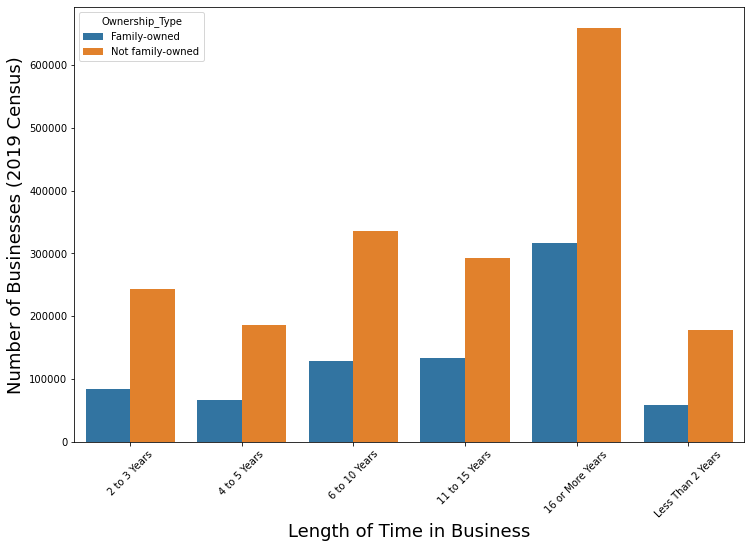

In [99]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x=business_survival['YIBSZFI_LABEL'], y=business_survival['FIRM_COUNT'], hue='Ownership_Type', data=business_survival)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Length of Time in Business', size=18)
ax.set_ylabel('Number of Businesses (2019 Census)', size=18)
ax.set

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
business_industry = pd.read_json(r'http://api.census.gov/data/2018/abscb?get=BUSCHAR_LABEL,QDESC_LABEL,NAICS2017_LABEL,FIRMPDEMP&for=us&BUSCHAR=BM&QDESC=B02&NAICS2017!=00&key=bccfff37a66ca0c564d5d5d80d0236771b334f9b')

business_industry.columns = business_industry.iloc[0]

business_industry = business_industry.iloc[1:].reset_index(drop=True)

# business_industry.rename(columns={'FIRMPDEMP':'FIRM_COUNT'}, inplace=True)

# business_industry['FIRMPDEMP'] = business_industry['FIRMPDEMP'].astype(int)

# business_industry = business_industry[['BUSCHAR_LABEL','QDESC_LABEL','NAICS2017_LABEL','FIRMPDEMP','BUSCHAR','QDESC','NAICS2017','us']]

business_industry

,BUSCHAR_LABEL,QDESC_LABEL,NAICS2017_LABEL,FIRMPDEMP,BUSCHAR,QDESC,NAICS2017,us
0,Family-owned,FAMOWN,"Agriculture, forestry, fishing and hunting",4760,BM,B02,11,1
1,Family-owned,FAMOWN,"Mining, quarrying, and oil and gas extraction",2868,BM,B02,21,1
2,Family-owned,FAMOWN,Utilities,446,BM,B02,22,1
3,Family-owned,FAMOWN,Construction,120521,BM,B02,23,1
4,Family-owned,FAMOWN,Manufacturing,42876,BM,B02,31-33,1
5,Family-owned,FAMOWN,Wholesale trade,50719,BM,B02,42,1
6,Family-owned,FAMOWN,Retail trade,107925,BM,B02,44-45,1
7,Family-owned,FAMOWN,Transportation and warehousing,24764,BM,B02,48-49,1
8,Family-owned,FAMOWN,Information,7961,BM,B02,51,1
9,Family-owned,FAMOWN,Finance and insurance,28503,BM,B02,52,1


In [41]:
business_industry

business_industry['FIRMPDEMP'] = business_industry['FIRMPDEMP'].astype(int)


business_industry[['BUSCHAR_LABEL','NAICS2017_LABEL','FIRMPDEMP','NAICS2017','us']]

,BUSCHAR_LABEL,NAICS2017_LABEL,FIRMPDEMP,NAICS2017,us
0,Family-owned,"Agriculture, forestry, fishing and hunting",4760,11,1
1,Family-owned,"Mining, quarrying, and oil and gas extraction",2868,21,1
2,Family-owned,Utilities,446,22,1
3,Family-owned,Construction,120521,23,1
4,Family-owned,Manufacturing,42876,31-33,1
5,Family-owned,Wholesale trade,50719,42,1
6,Family-owned,Retail trade,107925,44-45,1
7,Family-owned,Transportation and warehousing,24764,48-49,1
8,Family-owned,Information,7961,51,1
9,Family-owned,Finance and insurance,28503,52,1


In [45]:
sorted_business_industry = business_industry.sort_values(by='FIRMPDEMP', ascending=False) 

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:xlabel='Number of Businesses (2019 Census)', ylabel='Industry Sector'>>

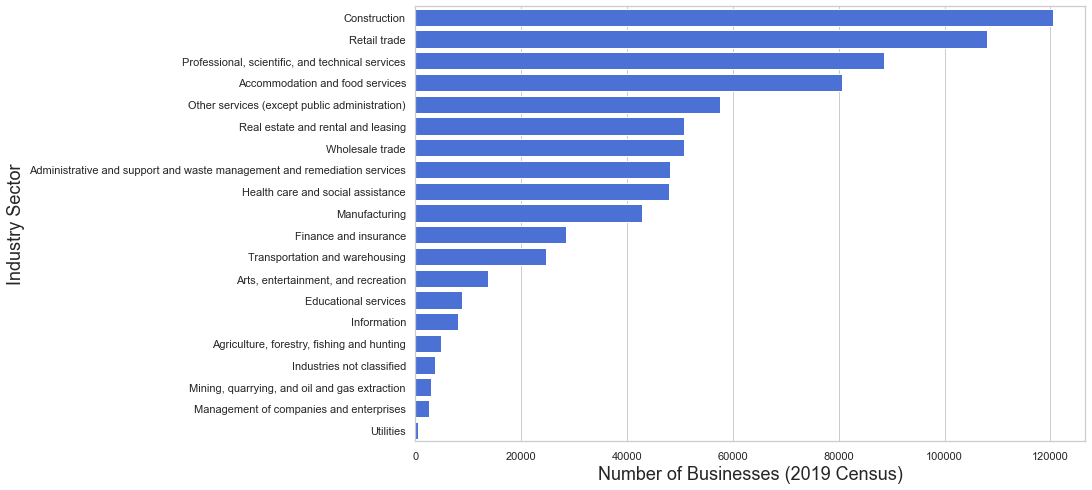

In [61]:
sns.set_theme(style='whitegrid')
plt.figure(figsize = (12,8))
ax = sns.barplot(x=sorted_business_industry['FIRMPDEMP'], y=sorted_business_industry['NAICS2017_LABEL'], color='#3467eb', data=sorted_business_industry)
# ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('Number of Businesses (2019 Census)', size=18)
ax.set_ylabel('Industry Sector', size=18)
ax.set
